IRIS 데이터에 대해 클러스터링을 해보고 모델 평가를 하는 코드입니다.
이 코드에서는 교차표를 이용해 결과를 확인하는데, 이 외에도 파라머_Clustering.ipynb에 나오는 silhouette_score나 수업시간에 배운 다른 모델 평가 방식을 사용해보길 바랍니다.
과제 #3은 Mall_Customer.csv 데이터를 불러오고, 전처리와 EDA를 한 후,
수업시간에 배운 아래의 세 가지 방법 + 새로운 방법 최소 한 가지를 이용해 Clustering을 하고
하이퍼파라미터도 변화시켜보고
다양한 Clustering 방법에 대해 비교/평가하는 과제입니다.

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맑은 고딕을 사용하겠습니다 !
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [6]:
def transform(x):
    if x == 'Male':
        return 1
    else:
        return 0

In [7]:
df['Gender'] = df['Gender'].apply(transform)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
gender = df['Gender'].value_counts() # value_counts는 클래스 별 갯수를 반환

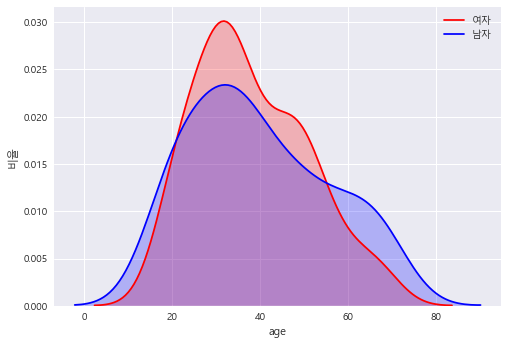

In [10]:
g = sns.kdeplot(df.query('Gender == 0')['Age'], color = "red",shade= True)
g = sns.kdeplot(df.query('Gender == 1')['Age'], color = 'blue', shade = True)
g.set_xlabel('age') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

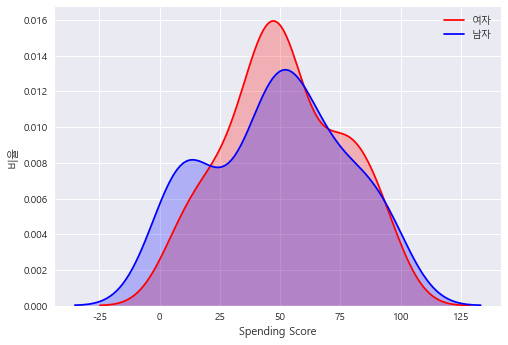

In [11]:
g = sns.kdeplot(df.query('Gender == 0')['Spending Score (1-100)'], color = "red",shade= True)
g = sns.kdeplot(df.query('Gender == 1')['Spending Score (1-100)'], color = 'blue', shade = True)
g.set_xlabel('Spending Score') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

C:\Users\MiSung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MiSung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


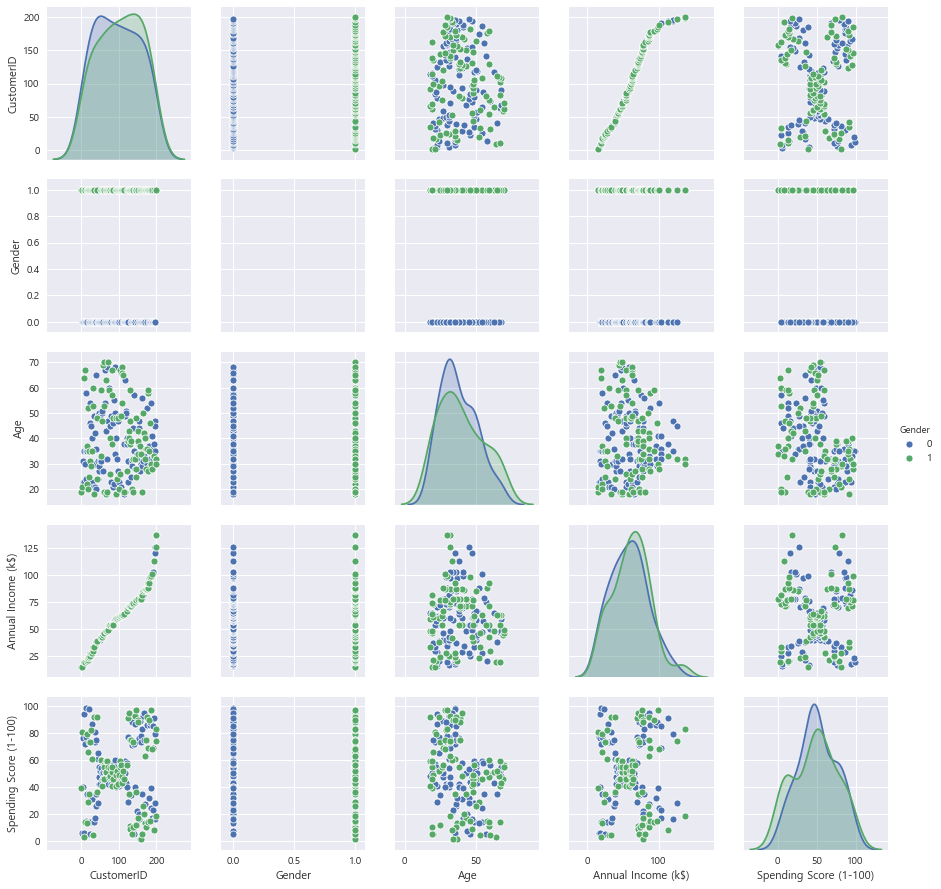

In [12]:
sns.pairplot(df,hue="Gender")

- 성별에 따라 큰 구분이 없어 보임
- 소득과 소비수준(점수)를 봤을 때 군집이 보임

#### 이 결과를 보니까 Spending Score 와 Annual Income 으로 그린 거에서 뭉쳐있는게 보인다.

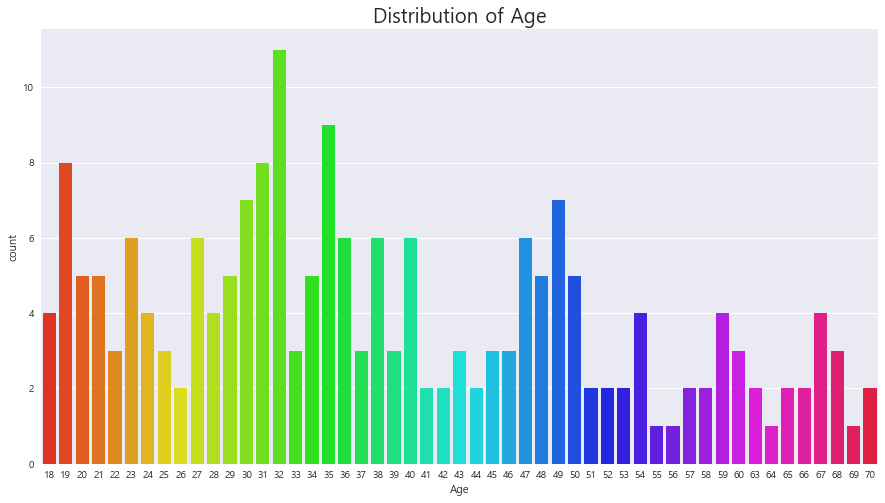

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

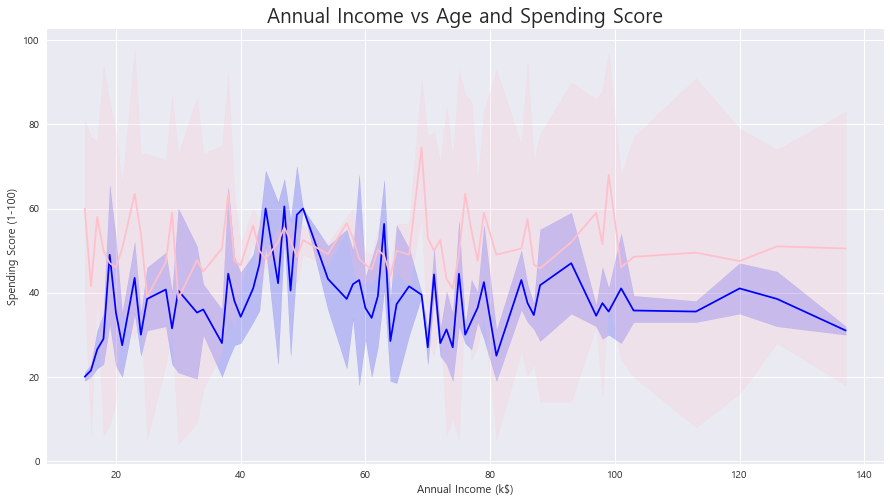

In [14]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [17]:
# annual incomes , spending scores
# Extracting the useful features from the dataset
x = df.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Hierarchical Clustering

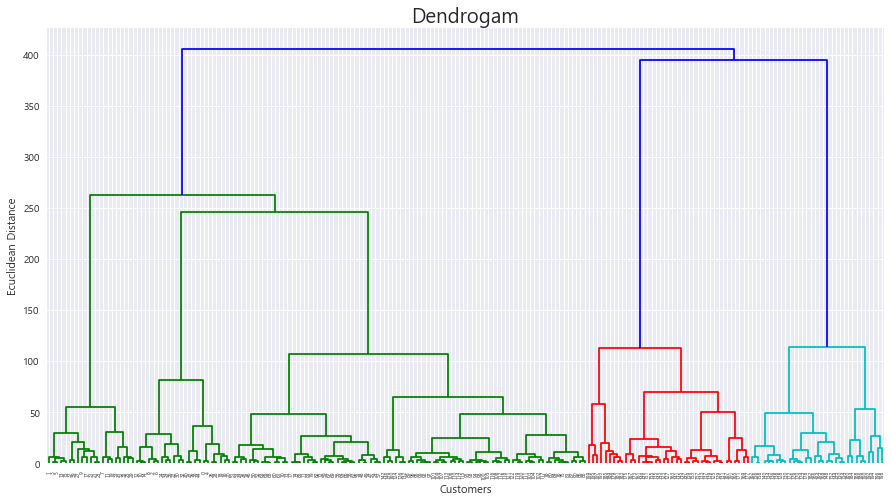

In [26]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# x : annual incomes , spending scores
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [40]:
from scipy.cluster.hierarchy import fcluster

# fcluster(linkage함수, 클러스터링을 멈추도록하는 임계값, 거리를 기준으로)
# 위의 덴드로그램에서 클러스터간의 거리가 350인 지점에서 자르면 3개의 cluster가 형성됨을 알 수 있다.
# 따라서 임계값을 350으로 정한다.
predict = pd.DataFrame(fcluster(mergings,350,criterion='distance'))
predict.columns=['predict'] # predict column에 예측 결과


Text(2000.0, 200, ' 5 Clusters ')

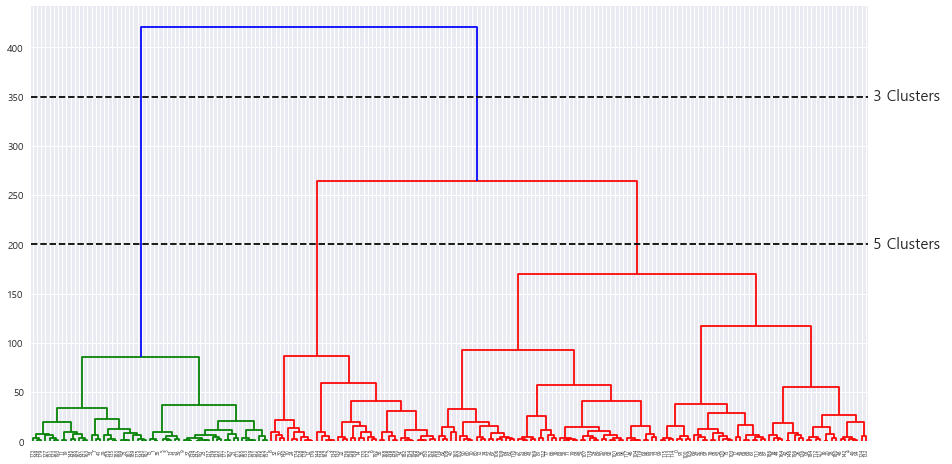

In [41]:
# Hierarchical에서 적절하게 클러스터 나누기
# 거리 차이가 많이 나는 경우 ( 가장 명확하게 보이는 지점에 클러스터를 나눠보았다.)

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
           
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350,350], '--', c='k')  # 3개의 클러스터가 생기는 지점
ax.plot(bounds, [200, 200], '--', c='k')  # 5개의 클러스터가 생기는 지점
ax.text(bounds[1], 350, ' 3 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 200, ' 5 Clusters ', va='center', fontdict={'size': 15})



### K-means Clustering

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics.cluster import silhouette_score

In [52]:
x = df.iloc[:, [2, 4]].values

# Extracting the useful features from the dataset
# x= age, Spending Score (1-100)
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

### Elbow methods
- 군집 수 K의 변화에 따라
- Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
-  즉, 군집의 응집도를 나타내는 값

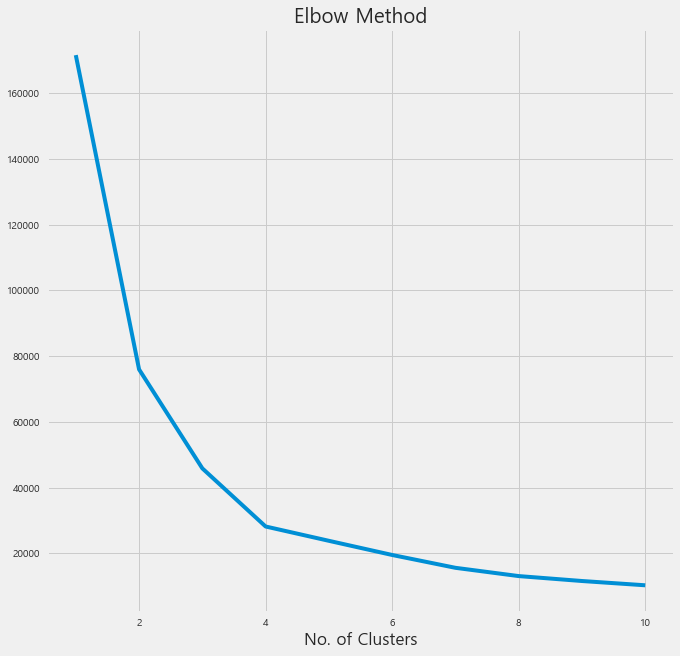

In [53]:
# 몇개의 클러스터를 사용하면 좋을지 elbow method를 사용한다. 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.title("Elbow Method")
plt.show()

optimal number of cluster= 4
- 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

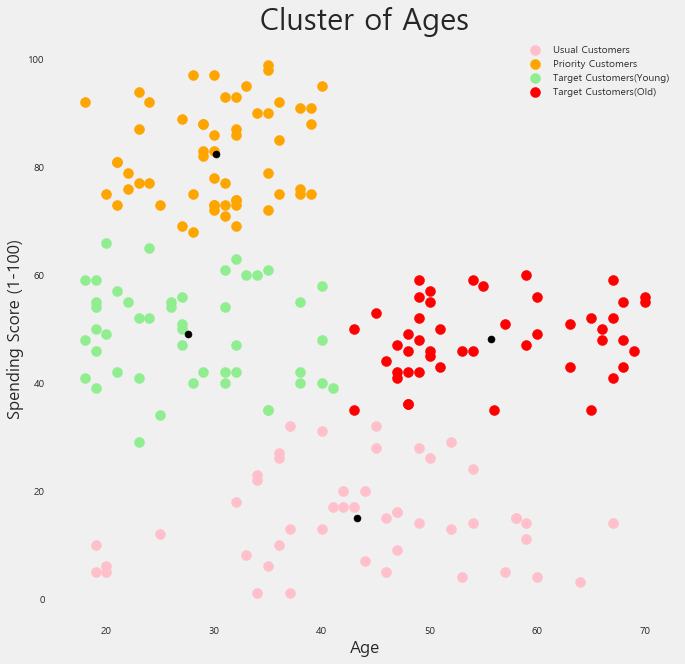

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [55]:
# label이 정해져 있지 않기 때문에 crosstab을 하기 보다는 실루엣 스코어를 사용해 군집이 잘 되었는지 평가
silhouette_avg = silhouette_score(x, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.1632888738101461


In [56]:
# Annual Income (k$) , Spending Score (1-100)
x = df.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

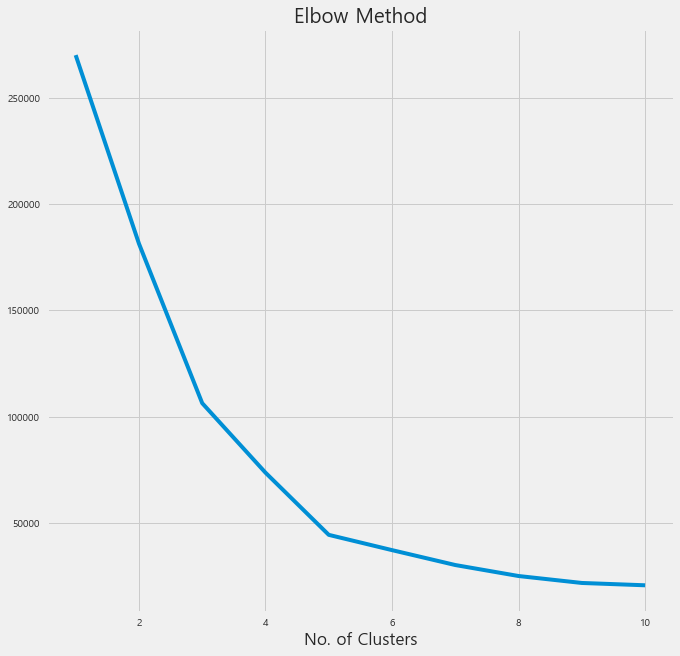

In [57]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.title("Elbow Method")
plt.show()

cluster =5 
- 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

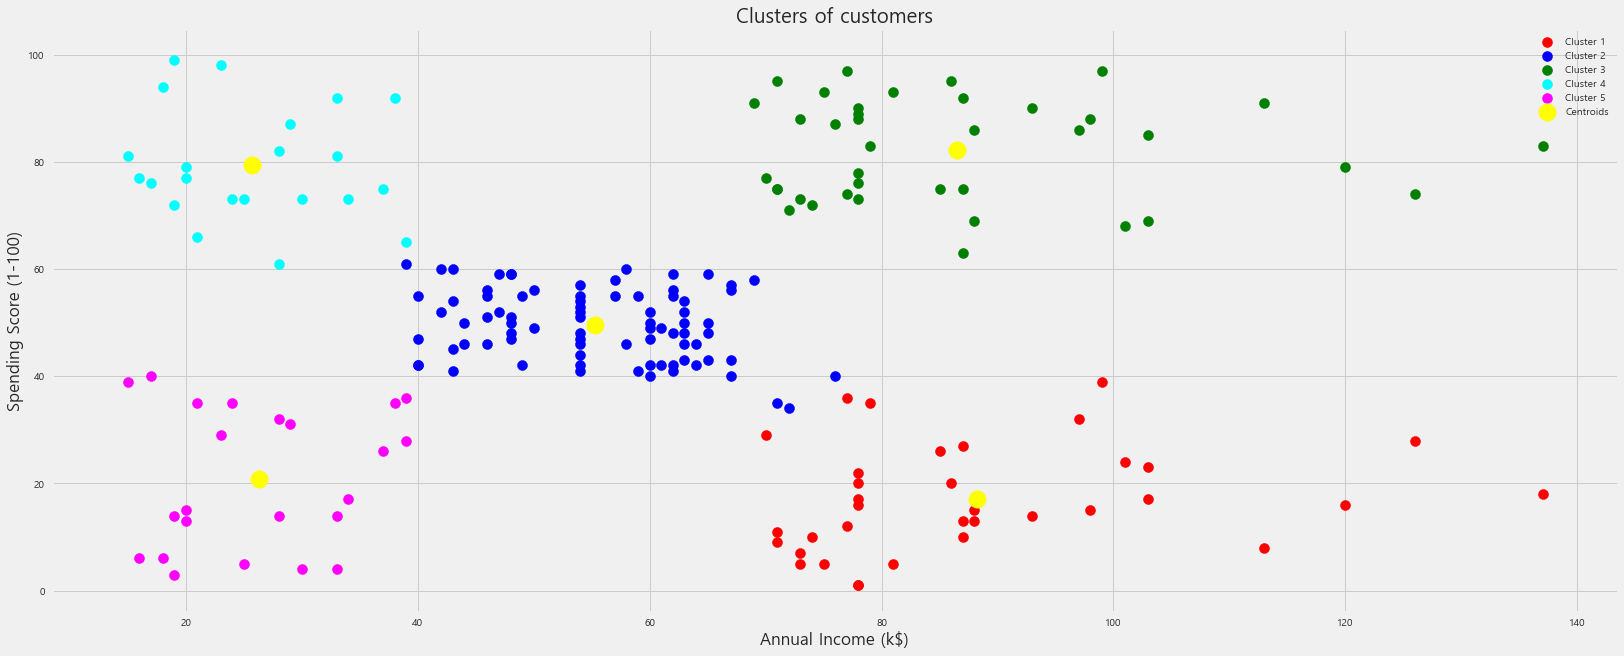

In [58]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

fig = plt.figure(figsize=(25, 10))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [49]:
# label이 정해져 있지 않기 때문에 crosstab을 하기 보다는 실루엣 스코어를 사용해 군집이 잘 되었는지 평가
silhouette_avg = silhouette_score(x, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.553931997444648


### DBSCAN

In [62]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

The average silhouette_score is : 0.35070898426844344


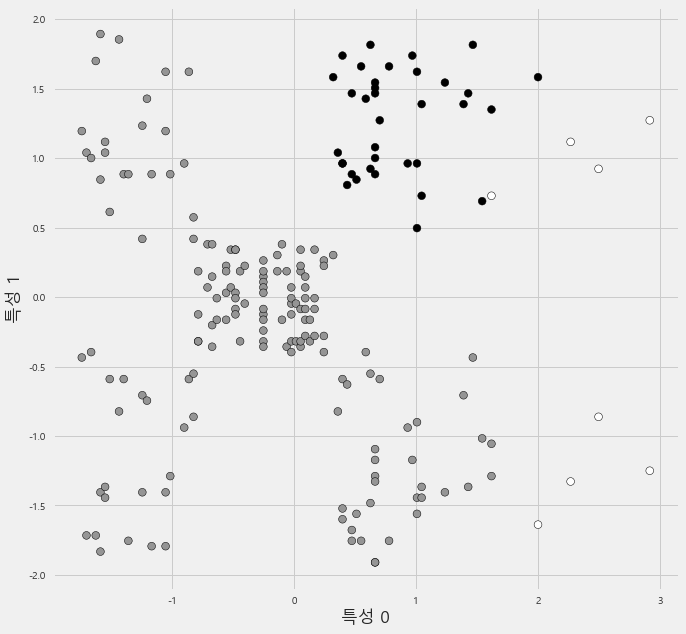

In [69]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

# create model and prediction
model = DBSCAN()
predict = model.fit_predict(X_scaled)

#plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predict,  s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 성능평가
silhouette_avg = silhouette_score(x, predict)
print("The average silhouette_score is :", silhouette_avg)

### Spectral Clustering
- 그래프(graph) 기반 군집화 기법인 Spectral Clustering
- 

The average silhouette_score is : 0.4583935401539264


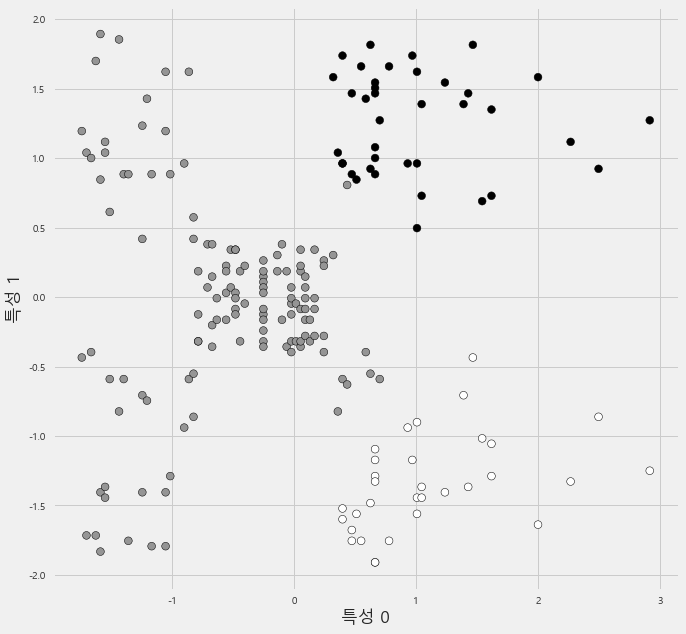

In [70]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering


#scale
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

# create model and prediction
model = SpectralClustering(n_clusters=3,n_init=10)
predict = model.fit_predict(X_scaled)


#plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predict,  s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 성능평가
silhouette_avg = silhouette_score(x, predict)
print("The average silhouette_score is :", silhouette_avg)



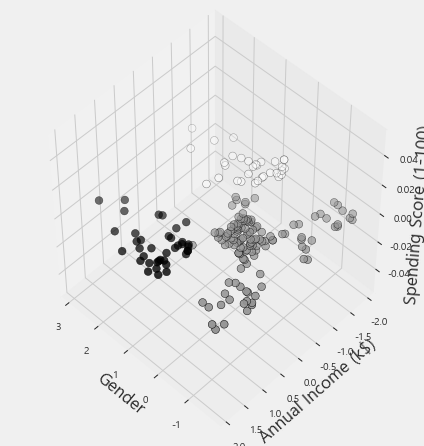

In [72]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predict,  s=60, edgecolors='black')
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()